In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_csv('../data/raw/wine-quality-white-and-red.csv')

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df = df[df['total sulfur dioxide'] < 300]

In [5]:
df = df[df['free sulfur dioxide'] < 120]

In [6]:
df = df[df['residual sugar'] < 50]

In [50]:
resultados_filtrados = df[df['residual sugar'] < 50]
resultados_filtrados

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,1,11.7,6.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6486 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6486 non-null   object 
 1   fixed acidity         6486 non-null   float64
 2   volatile acidity      6486 non-null   float64
 3   citric acid           6486 non-null   float64
 4   residual sugar        6486 non-null   float64
 5   chlorides             6486 non-null   float64
 6   free sulfur dioxide   6486 non-null   float64
 7   total sulfur dioxide  6486 non-null   float64
 8   density               6486 non-null   float64
 9   pH                    6486 non-null   float64
 10  sulphates             6486 non-null   float64
 11  alcohol               6486 non-null   float64
 12  quality               6486 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 709.4+ KB


In [9]:
df['type_num'] = df['type'].map({'white': 1, 'red': 2})

In [10]:
med_alc_sug = df.groupby('residual sugar')['alcohol'].mean()

df['alc-sug'] = df['residual sugar'].map(med_alc_sug)

In [11]:
med_qua_sug = df.groupby('residual sugar')['quality'].mean()

df['qua-sug'] = df['residual sugar'].map(med_qua_sug)

In [12]:
df.drop(columns='type', inplace=True)

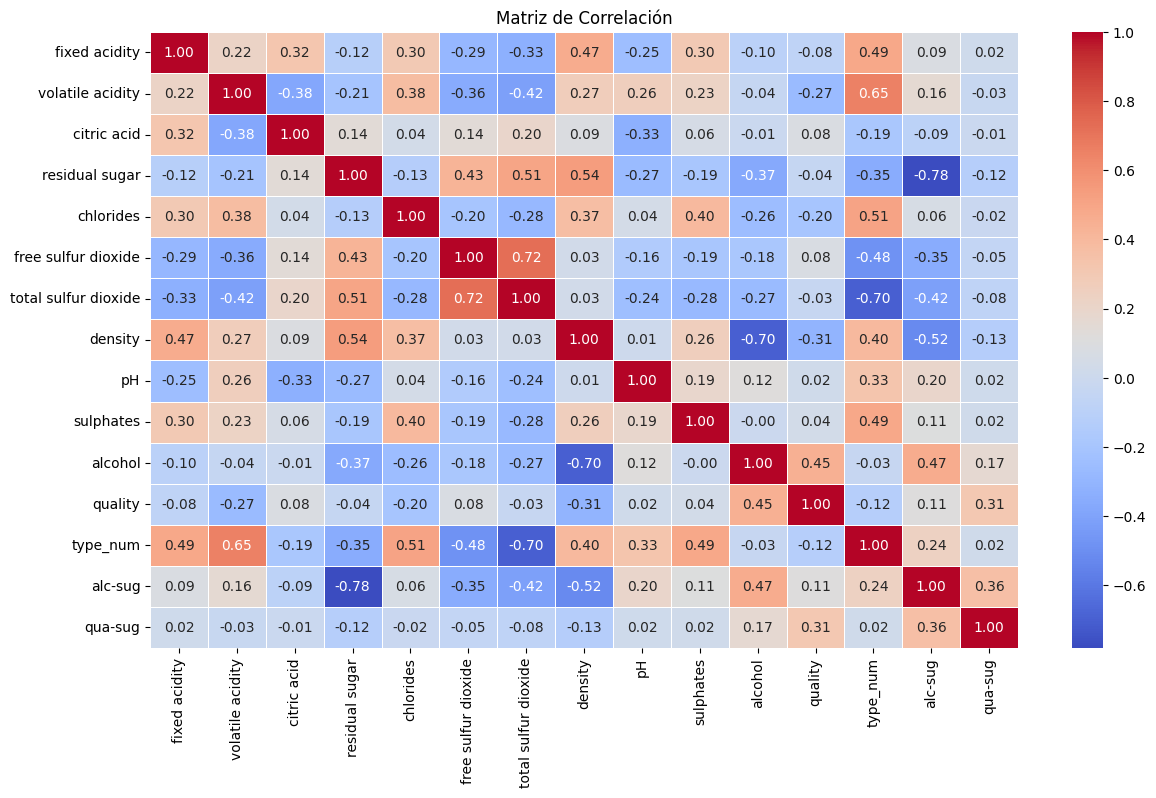

In [13]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug
count,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000
mean,7.214747,0.339582,0.318654,5.432562,0.056037,30.384443,115.453592,0.994688,3.218438,0.531244,10.492157,5.821153,1.246531,10.492157,5.821153
std,1.296742,0.164540,0.145366,4.697102,0.035059,17.182716,56.036163,0.002948,0.160726,0.148858,1.193207,0.870358,0.431024,0.559293,0.268680
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000,8.500000,4.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000,10.255556,5.709677
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,10.672460,5.812834
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,155.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,10.788827,5.917647
max,15.900000,1.580000,1.660000,31.600000,0.611000,118.500000,294.000000,1.010300,4.010000,2.000000,14.900000,9.000000,2.000000,13.400000,8.000000


In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
X = train.drop(columns=['quality','sulphates','pH', 'total sulfur dioxide'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

In [17]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        15645 non-null  float64
 1   volatile acidity     15645 non-null  float64
 2   citric acid          15645 non-null  float64
 3   residual sugar       15645 non-null  float64
 4   chlorides            15645 non-null  float64
 5   free sulfur dioxide  15645 non-null  float64
 6   density              15645 non-null  float64
 7   alcohol              15645 non-null  float64
 8   type_num             15645 non-null  int64  
 9   alc-sug              15645 non-null  float64
 10  qua-sug              15645 non-null  float64
 11  quality              15645 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.4 MB


In [18]:
X=df_balanced.drop(columns=['quality'])
y=df_balanced['quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid ={
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,2,3,4],
    'classifier__n_estimators': [100, 150,200],
    'classifier__max_depth': [2, 5, 10,15],
    
       
}

rf = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier()],
                         'classifier__max_depth': [2, 5, 10, 15],
                         'classifier__max_features': [1, 2, 3, 4],
                         'classifier__n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [22]:
print(rf.best_estimator_)
print(rf.best_score_)
print(rf.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=15, max_features=1))])
0.8998081535384376
{'classifier': RandomForestClassifier(), 'classifier__max_depth': 15, 'classifier__max_features': 1, 'classifier__n_estimators': 100}


In [23]:
final_model= rf.best_estimator_.fit(X_train, y_train)
y_pred = rf.best_estimator_.predict(X_test)

In [24]:
final_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=15, max_features=1))])

In [25]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [26]:
print("Matriz de Confusión:")
print(cm)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0]
 [  0   2 386  54  10   1   0]
 [  0   1  91 283  75   3   0]
 [  0   0   5  14 423   0   0]
 [  0   0   0   0   0 439   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 91.82%


In [29]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', GradientBoostingClassifier())  
])

param_grid = {
    'classifier__n_estimators': [50, 100, 150,200],
    'classifier__learning_rate': [0.2,0.5,1,2],
    'classifier__max_depth': [3, 4, 5],
    
}

gb = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.2, 0.5, 1, 2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [30]:
print(gb.best_estimator_)
print(gb.best_score_)
print(gb.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.5, max_depth=5,
                                            n_estimators=150))])
0.8979709332826168
{'classifier__learning_rate': 0.5, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}


In [31]:
gb_model= gb.best_estimator_.fit(X_train,y_train)
y_pred2 = gb.best_estimator_.predict(X_test)

In [32]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Matriz de Confusión:")
print(cm2)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy2 * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0]
 [  1   4 363  69  15   1   0]
 [  1   1  85 299  65   2   0]
 [  0   0   5  16 420   1   0]
 [  0   0   0   0   0 439   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 91.50%


In [69]:
pipe3 = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', svm.SVC())
])


svm_param = {
    'classifier': [svm.SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100,200],
    
}    

svc = GridSearchCV(pipe3, svm_param, cv=5, scoring='accuracy', n_jobs=-1)

svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier': [SVC()],
                         'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100,
                                           200]},
             scoring='accuracy')

In [70]:
print(svc.best_estimator_)
print(svc.best_score_)
print(svc.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC(C=200))])
0.840763479990146
{'classifier': SVC(), 'classifier__C': 200}


In [71]:
svc_model= svc.best_estimator_.fit(X_train,y_train)
y_pred3 = svc.best_estimator_.predict(X_test)

In [72]:
cm3 = confusion_matrix(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Matriz de Confusión:")
print(cm3)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy3 * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0]
 [  4  32 321  71  22   3   0]
 [  1  19  92 214 104  21   2]
 [  0   6  19  26 354  37   0]
 [  0   0   0   0   4 435   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 85.20%


In [73]:
pipe4 = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

knn_params = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3, 5, 7,9,15],
}

knn = GridSearchCV(pipe4, knn_params, cv=5, scoring='accuracy', n_jobs=-1)

knn.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'classifier__n_neighbors': [3, 5, 7, 9, 15]},
             scoring='accuracy')

In [74]:
print(knn.best_estimator_)
print(knn.best_score_)
print(knn.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])
0.8378875062385202
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 3}


In [75]:
knn_mod= knn.best_estimator_.fit(X_train,y_train)
y_pred4 = knn.best_estimator_.predict(X_test)

In [76]:
knn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'classifier__n_neighbors': [3, 5, 7, 9, 15]},
             scoring='accuracy')

In [77]:
cm4 = confusion_matrix(y_test, y_pred4)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Matriz de Confusión:")
print(cm4)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy4 * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0]
 [  6  26 316  79  24   2   0]
 [  3  14 100 215  97  23   1]
 [  0   0  16  36 381   9   0]
 [  0   0   0   0   0 439   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 86.07%
